Predictive maintenance allows early detection of failures based on historical data. This type of maintenance reduces unscheduled maintenance costs and incresases the lifespan of a machine. Generally 3 types of approaches exist in literature:
1. Using Life Time Data: Failures are anticipated before they occurs thanks to proportional hazard models and probability distributions of component failure times
2. Run-to-Failure Data: If run-to-failure data of many machines exists, then health state of a particular machine can be estimated by comparing the others.
3. Threshold Data: When historical or failure data does not exist, a degredation model can be created and failure time can be estimated with a threshold value.

In this work 'threshold data' approach is utilized because limited amount of run-to-failure data exist. Also bearings' features are suitable to create a degredation model. 


In [29]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install kaleido

In [2]:
!pip install scipy

In [3]:
!pip install scikit-learn

In [4]:
#importing necessary libraries
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit

# Merging Data

In [5]:
#Data paths
dataset_path_1st = 'data/1st_test/1st_test/'
dataset_path_2nd = 'data/2nd_test/2nd_test'
dataset_path_3rd = 'data/3rd_test/4th_test/txt'

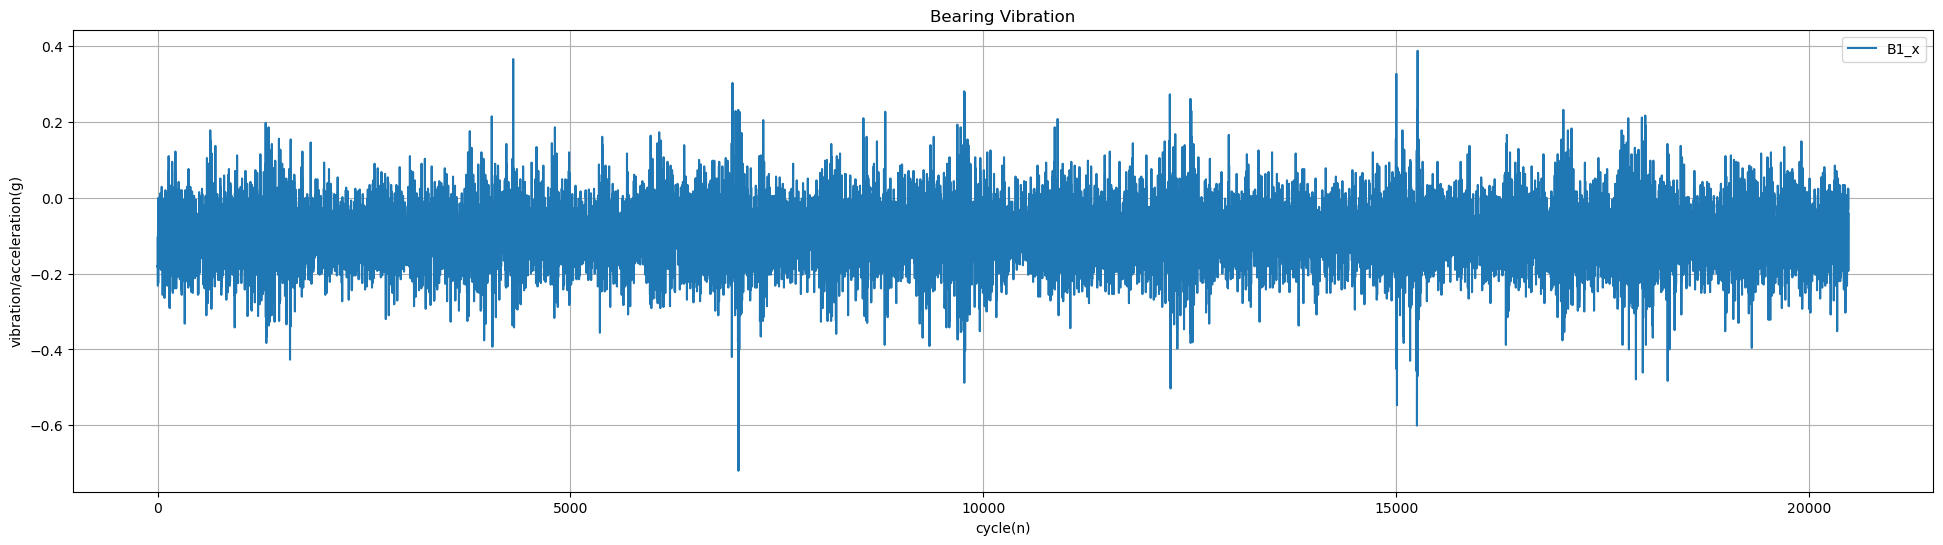

In [71]:
# Read dataset
dataset = pd.read_csv('data/1st_test/1st_test/2003.10.22.12.06.24', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

# Plot using Matplotlib
ax = dataset.B1_x.plot(figsize=(24, 6), title="Bearing Vibration", legend=True)

# Customize plot
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
ax.grid(True)

bearing = '1'
axis = 'x'

# Save the figure
plt.savefig(f"raw_data_bearing_{bearing}_axis_{axis}.png")

# Show the plot
plt.show()


In [7]:
# Root Mean Squared Sum
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result

def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_x','B1_y','B2_x','B2_y','B3_x','B3_y','B4_x','B4_y']
    cols2 = ['B1','B2','B3','B4']
    
    # initialize
    if id_set == 1:
        columns = [c+'_'+tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        columns = [c+'_'+tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)

        
        
    for filename in os.listdir(dataset_path):
        # read dataset
        raw_data = pd.read_csv(os.path.join(dataset_path, filename), sep='\t')
        
        # time features
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs/rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs
        
        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,8), columns=[c+'_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1,8), columns=[c+'_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1,8), columns=[c+'_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,8), columns=[c+'_kurtosis' for c in cols1])
            entropy = pd.DataFrame(entropy.reshape(1,8), columns=[c+'_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1,8), columns=[c+'_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1,8), columns=[c+'_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1,8), columns=[c+'_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1,8), columns=[c+'_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1,8), columns=[c+'_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1,8), columns=[c+'_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1,8), columns=[c+'_impulse' for c in cols1])
            
        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,4), columns=[c+'_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1,4), columns=[c+'_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1,4), columns=[c+'_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,4), columns=[c+'_kurtosis' for c in cols2])
            entropy = pd.DataFrame(entropy.reshape(1,4), columns=[c+'_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1,4), columns=[c+'_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1,4), columns=[c+'_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1,4), columns=[c+'_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1,4), columns=[c+'_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1,4), columns=[c+'_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1,4), columns=[c+'_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1,4), columns=[c+'_impulse' for c in cols2])
            
        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename] 
        
        # concat
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy, rms, max_abs, p2p,crest,clearence, shape, impulse], axis=1)
        
        # Exclude columns with all NA values before concatenation
        merge = merge.dropna(axis=1, how='all')

        data = pd.concat([data, merge])
        
    if id_set == 1:
        cols = [c+'_'+tf for c in cols1 for tf in time_features]
        data = data[cols]
    else:
        cols = [c+'_'+tf for c in cols2 for tf in time_features]
        data = data[cols]
        
    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()
    return data                                  

1.  Calling feature extraction function defined above to merge extracted features      
2.  Saving as .csv file

In [8]:
set1 = time_features(dataset_path_1st, id_set=1)
set1.to_csv('set1_timefeatures.csv')

C:\Users\Douglas MACHADO\AppData\Local\Temp\ipykernel_13028\490012288.py:107: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, merge])


Reading Data again

In [9]:
set1 = pd.read_csv("./set1_timefeatures.csv")
set1 = set1.rename(columns={'Unnamed: 0':'time'})
#set1 = set1.set_index('time')
last_cycle = int(len(set1))

In [10]:
set1.columns

Index(['time', 'B1_x_mean', 'B1_x_std', 'B1_x_skew', 'B1_x_kurtosis',
       'B1_x_entropy', 'B1_x_rms', 'B1_x_max', 'B1_x_p2p', 'B1_x_crest',
       'B1_x_clearence', 'B1_x_shape', 'B1_x_impulse', 'B1_y_mean', 'B1_y_std',
       'B1_y_skew', 'B1_y_kurtosis', 'B1_y_entropy', 'B1_y_rms', 'B1_y_max',
       'B1_y_p2p', 'B1_y_crest', 'B1_y_clearence', 'B1_y_shape',
       'B1_y_impulse', 'B2_x_mean', 'B2_x_std', 'B2_x_skew', 'B2_x_kurtosis',
       'B2_x_entropy', 'B2_x_rms', 'B2_x_max', 'B2_x_p2p', 'B2_x_crest',
       'B2_x_clearence', 'B2_x_shape', 'B2_x_impulse', 'B2_y_mean', 'B2_y_std',
       'B2_y_skew', 'B2_y_kurtosis', 'B2_y_entropy', 'B2_y_rms', 'B2_y_max',
       'B2_y_p2p', 'B2_y_crest', 'B2_y_clearence', 'B2_y_shape',
       'B2_y_impulse', 'B3_x_mean', 'B3_x_std', 'B3_x_skew', 'B3_x_kurtosis',
       'B3_x_entropy', 'B3_x_rms', 'B3_x_max', 'B3_x_p2p', 'B3_x_crest',
       'B3_x_clearence', 'B3_x_shape', 'B3_x_impulse', 'B3_y_mean', 'B3_y_std',
       'B3_y_skew', 'B3_y_kurto

In [11]:
time = set1.time

df_B1 = set1[['time', 'B1_x_mean', 'B1_x_std', 'B1_x_skew', 'B1_x_kurtosis',
              'B1_x_entropy', 'B1_x_rms', 'B1_x_max', 'B1_x_p2p', 'B1_x_crest',
              'B1_x_clearence', 'B1_x_shape', 'B1_x_impulse',
              'B1_y_mean', 'B1_y_std', 'B1_y_skew', 'B1_y_kurtosis',
              'B1_y_entropy', 'B1_y_rms', 'B1_y_max', 'B1_y_p2p', 'B1_y_crest',
              'B1_y_clearence', 'B1_y_shape', 'B1_y_impulse',]].copy()

df_B1.sample(5)

,time,B1_x_mean,B1_x_std,B1_x_skew,B1_x_kurtosis,B1_x_entropy,B1_x_rms,B1_x_max,B1_x_p2p,B1_x_crest,...,B1_y_skew,B1_y_kurtosis,B1_y_entropy,B1_y_rms,B1_y_max,B1_y_p2p,B1_y_crest,B1_y_clearence,B1_y_shape,B1_y_impulse
537,2003-11-03 14:01:44,0.135265,0.112439,-0.057528,0.579423,5.116752,0.163759,0.715,1.164,4.366163,...,0.001905,0.505884,4.979238,0.157432,0.737,1.303,4.681385,0.114641,1.198180,5.609144
1651,2003-11-21 05:44:03,0.129168,0.099154,-0.033209,0.838739,5.024149,0.153910,0.771,1.159,5.009420,...,0.078674,1.231364,4.872812,0.148630,0.696,1.262,4.682782,0.111882,1.176510,5.509340
977,2003-11-15 01:28:46,0.129093,0.097886,-0.023837,0.875680,4.916493,0.153407,0.776,1.245,5.058445,...,0.058573,1.342475,4.810889,0.147854,0.735,1.323,4.971103,0.112033,1.172643,5.829328
640,2003-11-08 19:01:44,0.128947,0.100766,-0.029371,1.164033,4.982363,0.154200,0.801,1.194,5.194552,...,-0.002161,1.801198,4.783659,0.149898,0.928,1.494,6.190866,0.111816,1.183389,7.326205
553,2003-11-07 17:01:44,0.128967,0.100528,-0.052836,0.852385,5.044467,0.154356,0.715,1.103,4.632153,...,0.102110,1.290872,4.882170,0.149767,0.674,1.282,4.500337,0.112043,1.180744,5.313747


In [12]:
df_B2 = set1[['time', 'B2_x_mean', 'B2_x_std', 'B2_x_skew', 'B2_x_kurtosis',
              'B2_x_entropy', 'B2_x_rms', 'B2_x_max', 'B2_x_p2p', 'B2_x_crest',
              'B2_x_clearence', 'B2_x_shape', 'B2_x_impulse',
              'B2_y_mean', 'B2_y_std', 'B2_y_skew', 'B2_y_kurtosis',
              'B2_y_entropy', 'B2_y_rms', 'B2_y_max', 'B2_y_p2p', 'B2_y_crest',
              'B2_y_clearence', 'B2_y_shape', 'B2_y_impulse',]].copy()
df_B2.sample(5)

,time,B2_x_mean,B2_x_std,B2_x_skew,B2_x_kurtosis,B2_x_entropy,B2_x_rms,B2_x_max,B2_x_p2p,B2_x_crest,...,B2_y_skew,B2_y_kurtosis,B2_y_entropy,B2_y_rms,B2_y_max,B2_y_p2p,B2_y_crest,B2_y_clearence,B2_y_shape,B2_y_impulse
763,2003-11-09 15:25:58,0.124770,0.090457,-0.058185,0.194922,5.019616,0.147739,0.581,0.891,3.932612,...,-0.078402,0.506905,4.826225,0.139089,0.610,0.886,4.385694,0.109384,1.148816,5.038356
5,2003-10-22 12:29:13,0.107681,0.089871,-0.048929,0.227347,4.989117,0.130434,0.701,1.023,5.374346,...,-0.034937,0.143714,4.850573,0.121718,0.427,0.664,3.508111,0.089497,1.189694,4.173577
430,2003-11-01 10:21:44,0.124399,0.092159,-0.118032,0.309220,5.035535,0.148133,0.625,0.901,4.219195,...,-0.022544,0.365598,4.893258,0.141161,0.552,0.882,3.910418,0.108788,1.160703,4.538833
448,2003-11-01 13:21:44,0.124820,0.093656,-0.047806,0.178844,5.054718,0.148510,0.596,0.899,4.013210,...,-0.055773,0.388659,4.889142,0.139801,0.620,0.867,4.434885,0.107248,1.163557,5.160241
1620,2003-11-21 00:34:03,0.126271,0.093691,-0.066462,0.238315,5.053154,0.150027,0.598,0.913,3.985944,...,-0.009864,0.382660,4.855774,0.140691,0.562,0.823,3.994562,0.110242,1.150746,4.596725


In [13]:
df_B3 = set1[['time', 'B3_x_mean', 'B3_x_std', 'B3_x_skew', 'B3_x_kurtosis',
              'B3_x_entropy', 'B3_x_rms', 'B3_x_max', 'B3_x_p2p', 'B3_x_crest',
              'B3_x_clearence', 'B3_x_shape', 'B3_x_impulse',
              'B3_y_mean', 'B3_y_std', 'B3_y_skew', 'B3_y_kurtosis',
              'B3_y_entropy', 'B3_y_rms', 'B3_y_max', 'B3_y_p2p', 'B3_y_crest',
              'B3_y_clearence', 'B3_y_shape', 'B3_y_impulse',]].copy()

df_B3.head(5)

,time,B3_x_mean,B3_x_std,B3_x_skew,B3_x_kurtosis,B3_x_entropy,B3_x_rms,B3_x_max,B3_x_p2p,B3_x_crest,...,B3_y_skew,B3_y_kurtosis,B3_y_entropy,B3_y_rms,B3_y_max,B3_y_p2p,B3_y_crest,B3_y_clearence,B3_y_shape,B3_y_impulse
0,2003-10-22 12:06:24,0.106149,0.091465,0.034351,0.405671,5.027652,0.128888,0.496,0.896,3.848299,...,-0.022286,0.777436,4.930004,0.131821,0.784,1.199,5.947458,0.093392,1.218868,7.249168
1,2003-10-22 12:09:13,0.106661,0.091737,0.001111,0.445954,4.985830,0.129564,0.566,1.059,4.368499,...,-0.028728,0.682840,5.057130,0.132052,0.576,0.993,4.361910,0.093646,1.217537,5.310789
2,2003-10-22 12:14:13,0.108740,0.091817,0.053031,0.389962,5.033128,0.131339,0.601,0.987,4.575934,...,0.019566,0.751218,5.051882,0.133295,0.620,0.984,4.651352,0.095119,1.213143,5.642756
3,2003-10-22 12:19:13,0.108068,0.092386,-0.023744,0.262551,5.040658,0.131078,0.552,0.874,4.211240,...,-0.008438,0.667691,5.040340,0.133972,0.684,1.036,5.105532,0.094920,1.217818,6.217610
4,2003-10-22 12:24:13,0.108454,0.091936,0.027091,0.326403,5.032258,0.131309,0.527,0.998,4.013429,...,-0.024844,0.475547,5.030937,0.133282,0.623,1.055,4.674301,0.094207,1.218861,5.697322


In [14]:
df_B4 = set1[['time', 'B4_x_mean', 'B4_x_std', 'B4_x_skew', 'B4_x_kurtosis',
              'B4_x_entropy', 'B4_x_rms', 'B4_x_max', 'B4_x_p2p', 'B4_x_crest',
              'B4_x_clearence', 'B4_x_shape', 'B4_x_impulse',
              'B4_y_mean', 'B4_y_std', 'B4_y_skew', 'B4_y_kurtosis',
              'B4_y_entropy', 'B4_y_rms', 'B4_y_max', 'B4_y_p2p', 'B4_y_crest',
              'B4_y_clearence', 'B4_y_shape', 'B4_y_impulse',]].copy()

df_B4.sample(5)

,time,B4_x_mean,B4_x_std,B4_x_skew,B4_x_kurtosis,B4_x_entropy,B4_x_rms,B4_x_max,B4_x_p2p,B4_x_crest,...,B4_y_skew,B4_y_kurtosis,B4_y_entropy,B4_y_rms,B4_y_max,B4_y_p2p,B4_y_crest,B4_y_clearence,B4_y_shape,B4_y_impulse
1031,2003-11-15 10:28:46,0.119230,0.071517,0.013230,0.885591,4.779036,0.135808,0.569,0.862,4.189733,...,0.044967,0.997607,4.874959,0.140246,0.518,0.826,3.693497,0.109657,1.152964,4.258469
730,2003-11-09 09:55:58,0.118882,0.072839,0.085073,1.069321,4.792064,0.135359,0.500,0.798,3.693882,...,0.049484,1.396039,4.806691,0.139418,0.574,1.077,4.117106,0.108183,1.158853,4.771120
2047,2003-11-24 10:21:24,0.135967,0.122925,-0.006341,1.327697,5.105518,0.167111,0.752,1.350,4.499999,...,0.036251,1.302316,5.086100,0.173837,0.920,1.533,5.292303,0.121940,1.229188,6.505234
1086,2003-11-15 19:38:46,0.117977,0.074377,-0.031045,0.676597,4.819780,0.135816,0.547,0.833,4.027507,...,0.010497,0.808541,4.874498,0.138321,0.623,0.923,4.504026,0.107407,1.157088,5.211552
90,2003-10-22 23:24:13,0.103643,0.066042,-0.058736,0.679831,4.701278,0.119533,0.420,0.664,3.513686,...,0.054536,1.410669,4.745368,0.115882,0.488,0.964,4.211187,0.088395,1.169145,4.923487


In [44]:
!pip install -U kaleido --upgrade
!pip install plotly --upgrade

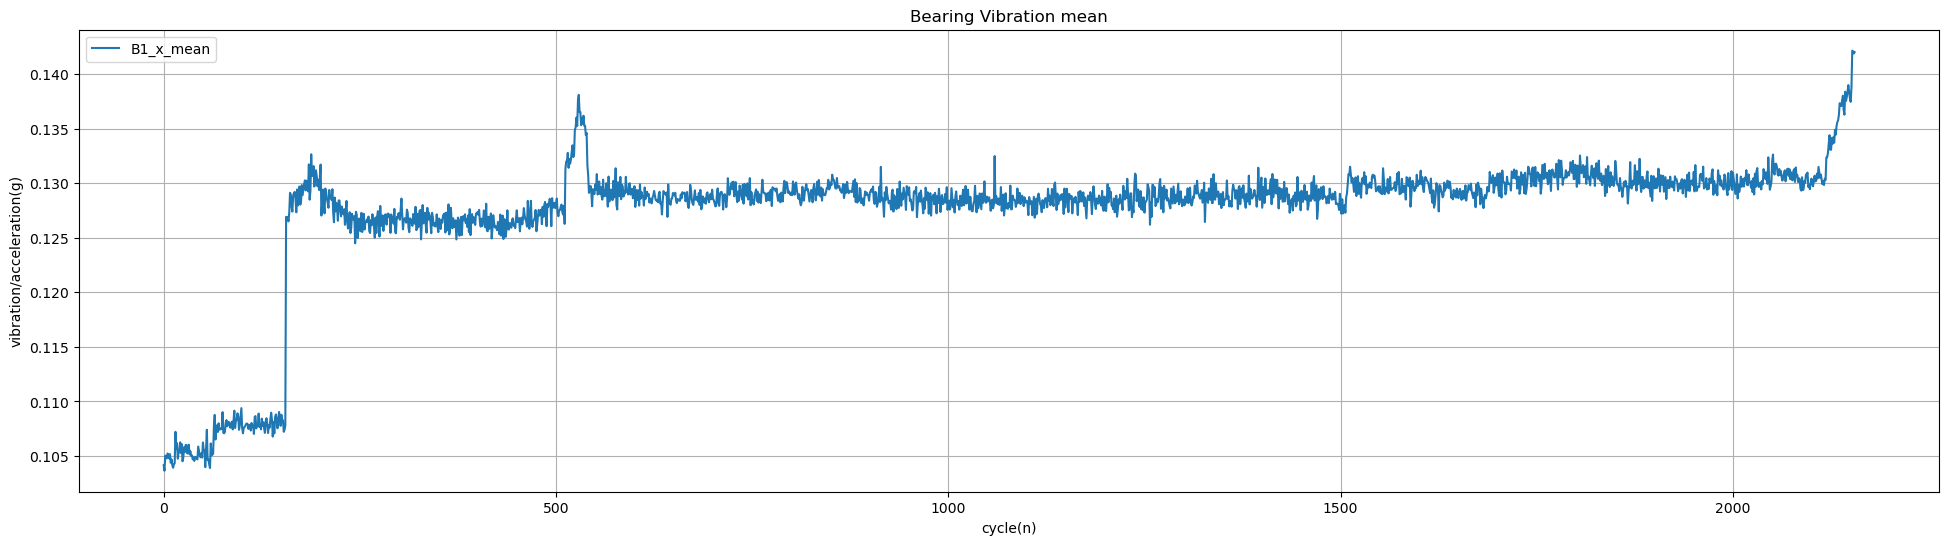

In [145]:
data = df_B1.B1_x_mean
bearing = '1'
axis = 'x'

# Plot using Matplotlib
ax = data.plot(figsize=(24, 6), title="Bearing Vibration mean", legend=True)

# Customize plot
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
ax.grid(True)

# Save the figure
plt.savefig(f"mean_acceleration_bearing_{bearing}_axis_{axis}.png")

# Show the plot
plt.show()

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal.windows import hamming


def plot_fft(signal1, signal2, signal3,
             name1='x1', name2='x2', name3='x3',
             plot_title='FFT plot', signal_length=None, bearing='', axis='', period=''):

    signal1 = signal1 - np.mean(signal1)
    signal2 = signal2 - np.mean(signal2)
    signal3 = signal3 - np.mean(signal3)

    N = len(signal1)
    T = 1 / N

    y1 = signal1
    y2 = signal2
    y3 = signal3

    w = hamming(N)

    yf1 = np.abs(fft(y1 * w))**2
    yf2 = np.abs(fft(y2 * w))**2
    yf3 = np.abs(fft(y3 * w))**2

    xf = fftfreq(N, T)[:N//2]

    if not signal_length:
        signal_length = N//2
    else:
        pass

    # Plot using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(xf[1:signal_length], 2.0/N * np.abs(yf1[1:signal_length]), color='blue', label=name1)
    plt.plot(xf[1:signal_length], 2.0/N * np.abs(yf2[1:signal_length]), color='red', label=name2)
    plt.plot(xf[1:signal_length], 2.0/N * np.abs(yf3[1:signal_length]), color='green', label=name3)
    plt.grid()

    # Customize plot
    plt.title(plot_title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.legend(title='Legend', loc='upper right')
    plt.ylim(0, 3)

    # Save the image
    plt.savefig(f"fft_plot_period_{period}_bearing_{bearing}_axis_{axis}.png")

    # Show the plot
    plt.show()

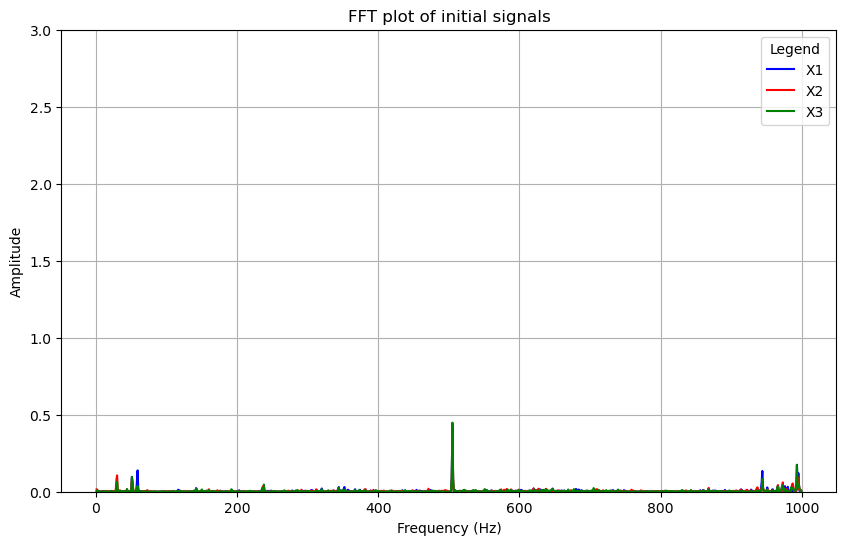

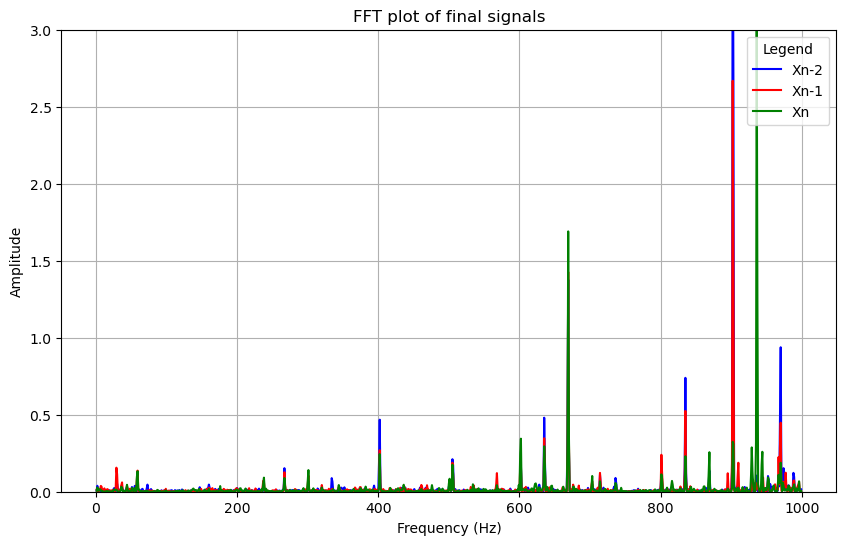

In [125]:
# Assuming you have a header row in the CSV file, you can use header=0
x1_beginning1 = pd.read_csv('data/1st_test/1st_test/2003.10.22.12.06.24', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

x1_beginning2 = pd.read_csv('data/1st_test/1st_test/2003.10.22.12.09.13', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

x1_beginning3 = pd.read_csv('data/1st_test/1st_test/2003.10.22.12.14.13', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

x1_end1 = pd.read_csv('data/1st_test/1st_test/2003.11.25.23.19.56', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

x1_end2 = pd.read_csv('data/1st_test/1st_test/2003.11.25.23.29.56', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

x1_end3 = pd.read_csv('data/1st_test/1st_test/2003.11.25.23.39.56', sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])

bearing = '1'
axis = 'x'

plot_fft(signal1 = x1_beginning1.B1_x.values,
         signal2 = x1_beginning2.B1_x.values,
         signal3 = x1_beginning3.B1_x.values,
         name1='X1',
         name2='X2',
         name3='X3',
         plot_title='FFT plot of initial signals', signal_length = 1000, bearing=bearing, axis=axis, period = 'initial')

plot_fft(signal1 = x1_end1.B1_x.values,
         signal2 = x1_end2.B1_x.values,
         signal3 = x1_end3.B1_x.values,
         name1='Xn-2',
         name2='Xn-1',
         name3='Xn',
         plot_title='FFT plot of final signals',
         signal_length=1000, bearing=bearing, axis=axis, period = 'final')

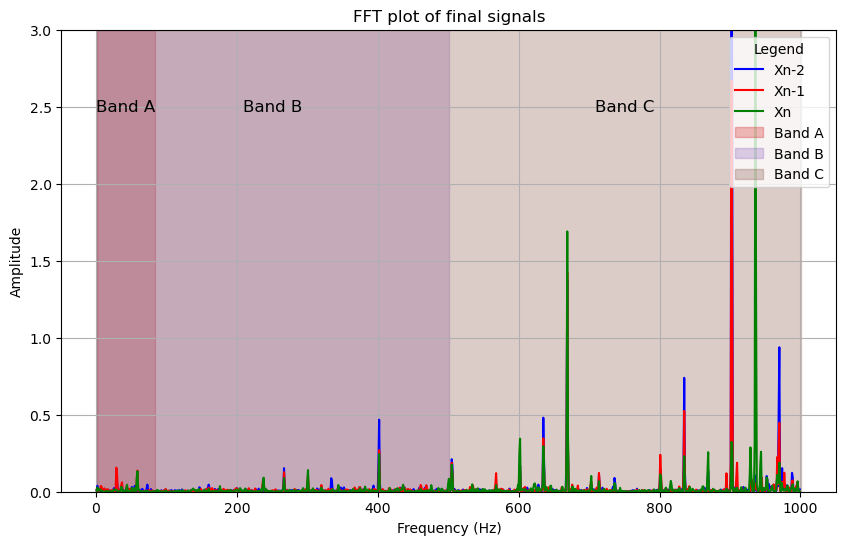

In [126]:
def plot_fft2(signal1, signal2, signal3,
             name1='x1', name2='x2', name3='x3',
             plot_title='FFT plot', signal_length=None, bearing='', axis='', period='',
             band_widths=None):

    signal1 = signal1 - np.mean(signal1)
    signal2 = signal2 - np.mean(signal2)
    signal3 = signal3 - np.mean(signal3)

    N = len(signal1)
    T = 1 / N

    y1 = signal1
    y2 = signal2
    y3 = signal3

    w = hamming(N)

    yf1 = np.abs(fft(y1 * w))**2
    yf2 = np.abs(fft(y2 * w))**2
    yf3 = np.abs(fft(y3 * w))**2

    xf = fftfreq(N, T)[:N//2]

    if not signal_length:
        signal_length = N//2

    # Plot using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(xf[1:signal_length], 2.0/N * np.abs(yf1[1:signal_length]), color='blue', label=name1)
    plt.plot(xf[1:signal_length], 2.0/N * np.abs(yf2[1:signal_length]), color='red', label=name2)
    plt.plot(xf[1:signal_length], 2.0/N * np.abs(yf3[1:signal_length]), color='green', label=name3)

    # Add shaded regions with different band widths
    if band_widths:
        for i, width in enumerate(band_widths):
            plt.axvspan(xmin=xf[1], xmax=xf[1] + width, color=f'C{i+3}', alpha=0.3, label=f'Band {chr(65 + i)}')
            # Annotate each shaded region with letters A, B, C
            if i != 2:
                plt.annotate(f'Band {chr(65 + i)}', xy=(xf[1] + width/2, 2.5), ha='center', va='center', fontsize=12)
            else:
                plt.annotate(f'Band {chr(65 + i)}', xy=(750, 2.5), ha='center', va='center', fontsize=12)
                

    plt.grid()

    # Customize plot
    plt.title(plot_title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.legend(title='Legend', loc='upper right')
    plt.ylim(0, 3)
    
    # Save the image
    plt.savefig(f"fft_plot_period_final_bearing_1_axis_x.png")

    # Show the plot
    plt.show()

# Example usage
plot_fft2(signal1=x1_end1.B1_x.values,
         signal2=x1_end2.B1_x.values,
         signal3=x1_end3.B1_x.values,
         name1='Xn-2',
         name2='Xn-1',
         name3='Xn',
         plot_title='FFT plot of final signals',
         signal_length=1000, bearing=bearing, axis=axis, period='final',
         band_widths=[83.3, 500, 1000])


In [143]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.fft import fft, fftfreq
from scipy.signal import hamming

dataset_path = dataset_path_1st
integration_array = []

bearing = '1'
axis = 'x'


for filename in os.listdir(dataset_path):
    df_raw_signal = pd.read_csv(os.path.join(dataset_path, filename), sep='\t', header=0, names=['B1_x', 'B1_y', 'B2_x', 'B2_y', 'B3_x', 'B3_y', 'B4_x', 'B4_y'])
    signal1 = df_raw_signal.B1_x.values
    signal1 = signal1 - np.mean(signal1)
    
    N = len(signal1)
    T = 1 / N
    w = hamming(N)
    yf1 = fft(signal1*w)
    yf1_abs_sq = np.abs(yf1)**2
    
    #integrated_s1 = sum(yf1_abs_sq[83:500])
    integrated_s1 = sum(yf1_abs_sq[83:500])
    integration_array.append(integrated_s1)

C:\Users\Douglas MACHADO\AppData\Local\Temp\ipykernel_13028\4211098652.py:22: DeprecationWarning:

Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.

C:\Users\Douglas MACHADO\AppData\Local\Temp\ipykernel_13028\4211098652.py:22: DeprecationWarning:

Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.

C:\Users\Douglas MACHADO\AppData\Local\Temp\ipykernel_13028\4211098652.py:22: DeprecationWarning:

Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.

C:\Users\Douglas MACHADO\AppData\Local\Temp\ipykernel_13028\4211098652.py:22: DeprecationWarning:

Importi

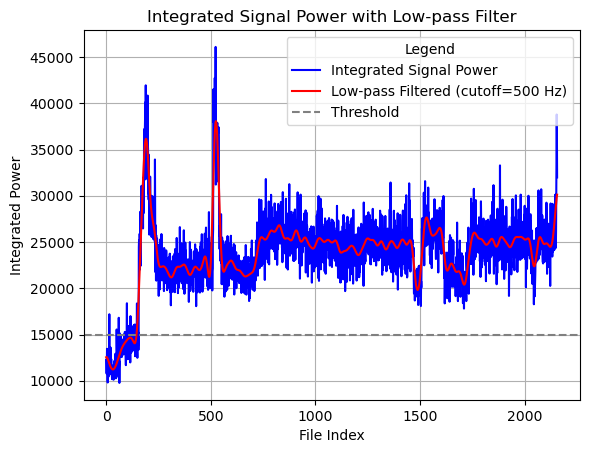

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Assuming integration_array is your signal

# Define a low-pass filter
def butter_lowpass_filter(data, cutoff_freq, sampling_freq, order=4):
    nyquist = 0.5 * sampling_freq
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Set the cutoff frequency and sampling frequency
cutoff_frequency = 500  # Adjust this value based on your requirements
sampling_frequency = 20e3  # Adjust this value based on your actual sampling frequency

# Apply the low-pass filter
filtered_signal = butter_lowpass_filter(integration_array, cutoff_frequency, sampling_frequency)

# Plot using Matplotlib
plt.figure()

# Original signal
plt.plot(range(len(integration_array)), integration_array, color='blue', label='Integrated Signal Power')

# Filtered signal
plt.plot(range(len(filtered_signal)), filtered_signal, color='red', label=f'Low-pass Filtered (cutoff={cutoff_frequency} Hz)')

plt.axhline(y = 15e3, color = 'gray', linestyle = 'dashed', label = "Threshold") 

# Customize plot
plt.title('Integrated Signal Power with Low-pass Filter')
plt.xlabel('File Index')
plt.ylabel('Integrated Power')
plt.legend(title='Legend', loc='upper right')
plt.grid()

# Save the figure
plt.savefig(f"fault_indicator_bearing_{bearing}_axis_{axis}_filtered.png")

# Show the plot
plt.show()
